----------------------------------------
<h1 style="text-align:center">ASI Assessed Exercise </h1>

----------------------------------------

<h3 style="text-align:left">Student: Alaa HOUIMEL</h3>

### Question 1
******

**a. Importing the MNIST Dataset:**

We can have more insights on how to explore and import our dataset by looking at the original utils functions provided by Zalando research

In [40]:
# this code  returns an iterator of 2-tuples with the first element being the label and the second element
#being a numpy.uint8 2D array of pixel data for the given image.
import os
import struct
import numpy as np

def read(dataset = "training", path = "."):

    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')

    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))  #offset 8
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)
    # this loads the data into np arrays
    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()

>Importing the training data:

In [41]:
MNIST_training_data = list(read(dataset='training',path='fashionmnist/'))
MNIST_training_labels = [MNIST_training_data[i][0] for i in range(len(MNIST_training_data))]

>Plotting the first image in the training dataset:

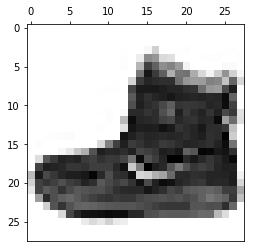

In [12]:
show(MNIST_training_data[0][1])

>Importing the test data:

In [42]:
MNIST_test_data = list(read(dataset='testing',path='fashionmnist/'))
MNIST_test_labels = [MNIST_test_data[i][0] for i in range(len(MNIST_test_data))]

**b. Importing the CIFAR10 Dataset:**

In [43]:
import numpy as np
import pickle
import os

def _unpickle(filename):
    file_path = os.path.join("cifar-10-batches-py/", filename)
    print("Loading data: " + file_path)
    with open(file_path, mode='rb') as file:
        data = pickle.load(file, encoding='bytes')
    return data

def _convert_images(raw):
    raw_float = np.array(raw, dtype=float) #/ 255.0
    images = raw_float.reshape([-1, 3, 32, 32])
    images = images.transpose([0, 2, 3, 1])
    return images

def _load_data(filename):
    data = _unpickle(filename)
    raw_images = data[b'data']
    cls = np.array(data[b'labels'])
    images = _convert_images(raw_images)
    return images, cls

def load_class_names():
    raw = _unpickle(filename="batches.meta")[b'label_names']
    names = [x.decode('utf-8') for x in raw]
    return names

def load_training_data():
    images = np.zeros(shape=[50000, 32, 32, 3], dtype=float)
    cls = np.zeros(shape=[50000], dtype=int)
    begin = 0
    for i in range(5):
        images_batch, cls_batch = _load_data(filename="data_batch_" + str(i + 1))
        num_images = len(images_batch)
        end = begin + num_images
        images[begin:end, :] = images_batch
        cls[begin:end] = cls_batch
        begin = end
    return images, cls

def load_test_data():
    images, cls = _load_data(filename="test_batch")
    return images, cls

In [44]:
import matplotlib.pyplot as plt
def plot_images(images, cls_true, cls_pred=None, smooth=True):
    assert len(images) == len(cls_true) == 9
    fig, axes = plt.subplots(3, 3)
    if cls_pred is None:
        hspace = 0.3
    else:
        hspace = 0.6
    fig.subplots_adjust(hspace=hspace, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        if smooth:
            interpolation = 'spline16'
        else:
            interpolation = 'nearest'
        ax.imshow(images[i, :, :, :],
                  interpolation=interpolation)
        cls_true_name = class_names[cls_true[i]]
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true_name)
        else:
            cls_pred_name = class_names[cls_pred[i]]
            xlabel = "True: {0}\nPred: {1}".format(cls_true_name, cls_pred_name)
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

>Importing the training data:

In [45]:
images, classes = load_training_data()

Loading data: cifar-10-batches-py/data_batch_1
Loading data: cifar-10-batches-py/data_batch_2
Loading data: cifar-10-batches-py/data_batch_3
Loading data: cifar-10-batches-py/data_batch_4
Loading data: cifar-10-batches-py/data_batch_5


>Plotting the first 9 images in the training dataset:

Loading data: cifar-10-batches-py/batches.meta


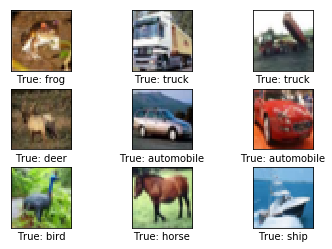

In [46]:
im = images[0:9]/255.0
class_names = load_class_names()
cls_true = classes[0:9]
plot_images(images=im, cls_true=cls_true, smooth=False)

>Importing the test data:

In [47]:
test_images, test_classes = load_test_data()

Loading data: cifar-10-batches-py/test_batch


### Question 2
******

**a. MNIST dataset:**

In [48]:
from collections import Counter
import pandas as pd
distributionOfClasses = Counter(MNIST_training_labels)
pd.DataFrame(np.column_stack([range(10),[distributionOfClasses[i] for i in range(10)]]), columns=['Classes','Occurrence']).transpose()

,0,1,2,3,4,5,6,7,8,9
Classes,0,1,2,3,4,5,6,7,8,9
Occurrence,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


>**Comment**

>The classes are: 0,1,2,3,4,5,6,7,8,9

>The distribution of the class labels is perfectly uniform. So calculating the prior distribution (the probability of each class) will have no impact on the prediction later.

>The input is a set of 60000 images of 28x28pixels. Depending on the processing that will be applied, training the models will take time since the dataset is quite big.

**b. CIFAR10 dataset:**

In [49]:
class_names = load_class_names()
print(class_names)

Loading data: cifar-10-batches-py/batches.meta
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [50]:
from collections import Counter
distributionOfClasses = Counter(classes)
distributionOfClasses
pd.DataFrame(np.column_stack([class_names,[distributionOfClasses[i] for i in range(10)]]), columns=['Classes','Occurrence']).transpose()

,0,1,2,3,4,5,6,7,8,9
Classes,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck
Occurrence,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


>**Comment**

>The classes are: 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

>The distribution of the class labels is perfectly uniform in this case also. So calculating the prior distribution (the probability of each class) will have no impact on the prediction later.

>The input is a set of 50000 images of 32x32x3pixels. So in this case, we have 2 additionnal layers(channels for colors) that will make the computations more complicated.

### Question 3
******

**a. Implementing the Naive Bayes Classifier:**

In [51]:
def separateByClass(dataset, classes):
    separated = {}
    for i in range(len(classes)):
        if (classes[i] not in separated):
            separated[classes[i]] = []
        separated[classes[i]].append(dataset[i])
    return separated

In [52]:
#I opted for a "naively" simple and explicitly expanded code adequate for these datasets. Nothing better than a code down to
# lowest levels to understand what really happens
# we calculate the means and variance in order to compute the likelihood 
def summarizeByClass(dataset, size, n_layers):
    summaries={}
    for a,b in dataset.items():
        if(n_layers==1):
            variance=[0]*size*size
            means = [0]*size*size
        else:
            variance=np.array([[0.0,0.0,0.0]]*size*size)
            means = np.array([[0.0,0.0,0.0]]*size*size)
        l=0
        for j in range(size):
            for k in range(size):
                for i in range (len(b)):
                    means[l] += np.array(b[i][j][k])
                means[l]= means[l]/float(len(b))
                for i in range (len(b)):
                    if (pow(np.array(b[i][j][k])-means[l],2) != 0) :
                        variance[l]+= pow(np.array(b[i][j][k])-means[l],2)
                    else :
                        variance[l]+=0.001
                variance[l]= variance[l]/float(len(b))
                l+=1
        if(n_layers==3):
            v0 = [y[0] for y in variance]       
            v1 = [y[1] for y in variance]
            v2 = [y[2] for y in variance]
            for h in range(len(variance)):
                # we replace 0-variances with a low value (0.001 )in order to avoid calculation problems 
                # we also normalize
                if (v0[h]<50) and (v0[h]>0):
                    variance[h][0] /=100.0
                elif(v0[h]==0):
                    variance[h][0]=0.001
                else:
                    variance[h][0]=2
                    
                if (v1[h]<50) and (v1[h]>0):
                    variance[h][1] /= 100.0
                elif(v1[h]==0):
                    variance[h][1]=0.001
                else:
                    variance[h][1]=2
                    
                if (v2[h]<50) and (v2[h]>0):
                    variance[h][2] /= 100.0
                elif(v2[h]==0):
                    variance[h][2]=0.001
                else:
                    variance[h][2]=2
                
        else:
            for h in range(len(variance)):
                if (variance[h]<50) and (variance[h]>0):
                    variance[h] /=100.0
                elif variance[h]==0 :
                    variance[h]=0.001
                else:
                    variance[h]=2 
        summaries[a] = [i for i in zip(means,variance)]     
    return summaries

In [53]:
import math
from collections import Counter

def logProbability(x, mean, stdev, n_layers):
    if(n_layers==1):
        logexp = -(math.pow(x-mean,2)/(2*math.pow(stdev,2)))
        return logexp-math.log(math.sqrt(2*math.pi) * stdev) 
    else:
        logexp = -np.divide((pow(x-mean,2)),(2*pow(stdev,2)))
        return logexp-np.array([math.log(math.sqrt(2*math.pi) * st) for st in stdev])

def calculateClassProbabilities(s, inputMatrix, size, n_layers):
    logProbabilities = {}
    for a, b in s.items():
        if n_layers==1:
            logProbabilities[a] = 0
        else:
            logProbabilities[a] = np.array([0.0,0.0,0.0])
        i=0
        for j in range(size):
            inputVector = inputMatrix[j]
            for k in range(size):
                mean, stdev = b[i]
                x = inputVector[k]
                if n_layers==1:
                    aux= logProbability(x, mean, stdev, n_layers)
                else:
                    aux= logProbability(np.array(x), np.array(mean), np.array(stdev), n_layers)
                logProbabilities[a] += aux
                i+=1
        if n_layers==3:
            logProbabilities[a]= sum(logProbabilities[a])
    return logProbabilities

In [54]:
def predict(summaries, inputMatrix, label, size, n_layers):
    probabilities = calculateClassProbabilities(summaries, inputMatrix, size, n_layers)
    bestLabel, bestProb = None, -1
    true_log_prob=probabilities[label]
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel, true_log_prob

def getPredictions(summaries, testSet, test_labels, training_labels, size, n_layers):
    predictions = []
    log_likelihood= 0
    for i in range(len(testSet)):
        result, true_log_prob = predict(summaries, testSet[i].tolist(), test_labels[i], size, n_layers)
        predictions.append(result)
        log_likelihood+=true_log_prob
    return predictions, log_likelihood/len(testSet)  #mean over all the test dataset

def getAccuracy(testLabels, predictions):
    correct = 0
    for x in range(len(testLabels)):
        if testLabels[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testLabels))) * 100.0

In [55]:
import time
def NBC(training_data, training_labels, test_data, test_labels, size, n_layers):
    sep = separateByClass(training_data, training_labels)
    summaries = summarizeByClass(sep, size, n_layers)
    t0= time.time()
    predictions, log_likelihood = getPredictions(summaries, test_data, test_labels, training_labels, size, n_layers)
    print('Time spent on prediction: ',time.time()-t0)
    accuracy = getAccuracy(test_labels, predictions)
    print("Test Accuracy: ",accuracy,"%")
    print("Log-likelihood: ", log_likelihood)
    return predictions

**b. Positive and Negative feature of the Naive Bayes Classifier:**

>**Answer**

>Positive feature: The naive Bayes Classifier is quite simple to implement and easy to understand, and it surprisingly delivers good results when compared to other more sophisticated classifiers (under the right circumstances )

>Negative feature: It fundamnetally relies on the unlikely assumption of conditional independence (which is usually not the case). . the naive bayes classifier also performs poorly when we're dealing with high dimensional datasets. this can lead to numerical instabilities especially when calculating likelihoods since computational approxiamtions could easily round down low values to zero 

**c. Data preprocessing:**

>**Answer**

>Data processing can have quite the influence on the naive bayes classifier's performance (because as we said it highly depends on the dimensionality of the problem) .
We have many ways to tackle this point. for starters we could trie to normalize all the values of the pixels to be in the interval [0,1] by dividing over 255 (max value for pixels). But, the results weren't good enough. I decided to work with the actual values between 0 and 255.

>we can also consider variance threshholding to reduce our dimensionality and try to numerically stabilize our values.
A problem when choosing the gaussian distribution for each pixel of the same class was that there were a lot of "certain" values with zero variance and others with so high variance (this can be explained especially for the MNIST data because of the common background in the images). We can assign a low value (<<<1) for these (zero) variances to avoid computational problems. For the points that have high variances (I chose 50 as a threshold), I fixed their variances to 2. For the rest of variances, I divided them by 100 to have a low variance and concentrate them around their means. The choice of these values was more emperical than theoretical.

>In the case of CIFAR, it could be a good idea to convert the RGB images into B&W, since the RGB can lead to underfitting due to the vast amount of features (color can change gratly between images of the same class, cars don't always have the same color!) 

> more ideas could be applied to improve our classifier , like Principal compoment analysis, and additionally, we could perform outlier detection and filtering. A simplistic approach would be to get rid of features spaced more than 1 or 2 standard deviations from the mean for that particular feature, but it could lead to overfiltering. The formal approach would involve using some clustering method such as K-Means and compute the outlier detection based on it. 

There are some other posibilites for the data preprocessing, such as:
> **Feature expansion**: since we know already that the images have a very strong spatial correlation, we could use convolutional filtering on it with a set of filters (either a standard set as used in image compression like in JPEG or a crafted set of filters obtained from the convolutional layers of a trained Convolutional Neural Network) and add those results as new features. There are other ways to expand the features, but the best ones should make up for the loss of spatial correlation (max/mean pooling could also help).

> **Data reduction** using approaches such as Prinipal Component Analysis, which would help against the high number of dark pixels present in the images. However, since NBC is not very sensible to irrelevant features, we shouldn't expect much from this approach.

**d. Application of the NBC on the two datasets:**

>**Comments**

>Since the probabilities are between 0 and 1, the product of a large number of them will result in a so small value that would be considered as 0 which is not practical. That's why I used log-probabilities instead of the probabilities themselves since the log is an increasing function, the log of the product of the probabilities to calculate the likelihood becomes a sum of log-probabilities.

>Another thing is that since we assumed that the prior distribution was uniform, the expression to calculate the probability of the class given the point was simplified to be equal the likelihood.

Note: the resulting log likelihood are numerically high because of the variance preprocessing. it makes assessing the classifier's performance a bit more difficult to interpret wrt the log likelihood , but on the other hand it improves our overall accuracy . I'm personally not even mad about it.

In [35]:
MNIST_training_data_stripped = [MNIST_training_data[i][1] for i in range(len(MNIST_training_data))]
MNIST_test_data_stripped = [MNIST_test_data[i][1] for i in range(len(MNIST_test_data))]

predictions= NBC(MNIST_training_data_stripped, MNIST_training_labels, MNIST_test_data_stripped, MNIST_test_labels, 28, 1)

Time spent on prediction:  220.6109483242035
Test Accuracy:  69.33 %
Log-likelihood:  -20912240231.05557


In [19]:
cifar_predictions = NBC(images, classes, test_images, test_classes, 32, 3)

Time spent on prediction:  1938.8577723503113
Test Accuracy:  27.74 %
Log-likelihood:  -14380180452.866789


**e. Confusion Matrices:**

>On MNIST test dataset

In [20]:
from collections import Counter
ctr = Counter([(x,y) for x,y in zip(predictions, MNIST_test_labels)])
Mat=[]
for i in range(10):
    l=[]
    for j in range(10):
        l+=[ctr[(i,j)]]
    Mat+=[l]
    
pd.DataFrame(data=Mat)

,0,1,2,3,4,5,6,7,8,9
0,712,34,11,47,2,0,198,0,0,0
1,2,800,2,3,3,0,2,0,1,0
2,11,7,455,2,245,0,126,0,3,0
3,146,135,9,841,81,0,90,0,56,2
4,11,5,166,34,483,0,154,0,8,0
5,0,0,0,2,1,848,0,212,20,65
6,86,17,338,67,175,4,372,0,35,11
7,0,0,0,0,0,79,0,705,3,53
8,32,2,19,4,10,12,58,15,873,25
9,0,0,0,0,0,57,0,68,1,844


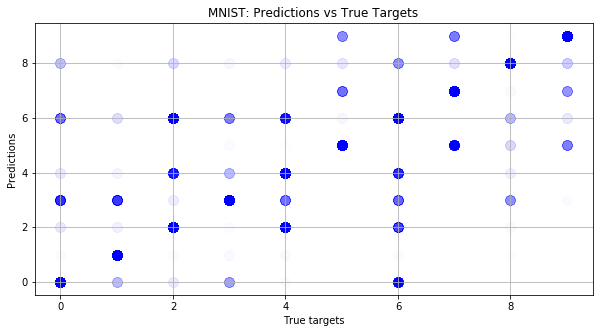

In [21]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.title("MNIST: Predictions vs True Targets")
plt.grid()
x = ax.scatter(np.array(MNIST_test_labels), np.array(predictions),s=100, c='blue', alpha=.007)
plt.xlabel("True targets")
plt.ylabel("Predictions")
plt.show()

>On CIFAR10 test dataset

In [22]:
#Confusion matrix:
from collections import Counter
ctr2 = Counter([(x,y) for x,y in zip(cifar_predictions, test_classes)])
Mat2=[]
for i in range(10):
    l=[]
    for j in range(10):
        l+=[ctr2[(i,j)]]
    Mat2+=[l]
    
pd.DataFrame(data=Mat2)

,0,1,2,3,4,5,6,7,8,9
0,539,149,254,171,107,167,114,148,215,152
1,54,186,46,31,30,22,34,46,90,118
2,23,11,107,38,78,45,44,19,7,6
3,14,18,12,56,14,40,19,20,9,9
4,19,30,65,29,119,37,23,78,11,21
5,40,56,78,185,101,286,90,107,92,30
6,73,254,310,313,394,246,538,192,55,110
7,18,39,58,75,69,68,82,166,12,35
8,146,87,29,21,29,40,5,46,370,112
9,74,170,41,81,59,49,51,178,139,407


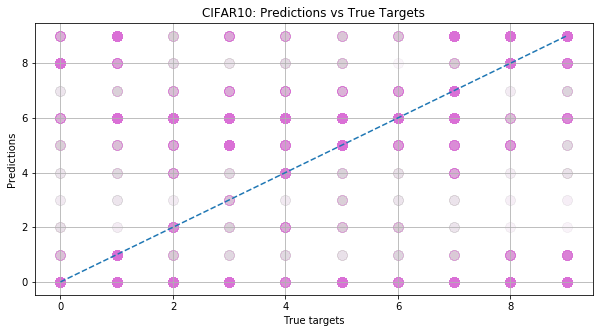

In [23]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)
plt.title("CIFAR10: Predictions vs True Targets")
plt.grid()
x = ax.scatter(np.array(test_classes), np.array(cifar_predictions),s=100, c='orchid', alpha=.007)
plt.plot(range(10), '--')
plt.xlabel("True targets")
plt.ylabel("Predictions")
plt.show()

**f. Performance and comparison:**

>**Answer**

>For MNIST dataset, the prediction of the classes of the 10000 test dataset took less than 10 mins with an accuracy around 70 %. This resulted in a good representation of the confusion matrix. It was clear that most of the predictions corresponded to the true targets.

>On the other hand, the prediction of the classes of the 10000 test dataset of CIFAR10 took more than 47 mins with an accuracy about 28%. This resulted in not as good confusion matrix representation as MNIST's. That's why I decided to draw an oblic line to link the points in which we got a correspondance between the predictions and the targets because it wasn't as obvious as in the first representation.

> The major difference in performances between the two datasets is probably caused by the increased complexity of the CIFAR10 dataset (real low resolution images vs simple handwritten images). For the MNIST, by analyzing the confusion matrix we detect slight errrors especially in the 3rd, 4th and 6th classes, with the diagonal reflecting an acceptable accuracy on predicting the right class. The confussion matrix for CIFAR10 is much more variate, as expected when we obtained sucha low accuracy. 

In [24]:
from random import randint
rd_classes= [randint(0,9) for i in range(10000)]
print('CIFAR10 accuracy using random classifier',getAccuracy(test_classes,rd_classes),'%')
print('MNIST accuracy using random classifier',getAccuracy(MNIST_test_labels,rd_classes),'%')

CIFAR10 accuracy using random classifier 9.93 %
MNIST accuracy using random classifier 10.17 %


>**Comment**

>The accuracy of a random class labels classifier for both datasets is around 10%. Since we achieved 28% and 69% accuracies for respectively CIFAR10 and MNIST, we can say that our classifier is significantly better than a random classifier.

>To improve the performance, adjusting the tunable parameters of the Naive Bayes Classifier is limited, but improving the pre-processing applied on the data and adding eventually more training data would improve the accuracy.


### Question 4: Linear Regression
******

**a. Implementing the Bayesian Linear Regression:**

In [56]:
def BLR(training_data, training_labels, test_data, test_labels, size, n_layers):
    training_data = training_data + np.random.random([training_data.shape[0], training_data.shape[1]])  # adding noise to the data
    X = np.ones((training_data.shape[0],training_data.shape[1]+1), dtype=training_data.dtype)
    X[:,1:] = training_data[:,:]
    y = training_labels
    w = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
    sigma = 1/float(len(training_labels)) * (training_labels - X.dot(w)).dot((training_labels-X.dot(w)).T)
    coW= sigma * np.linalg.inv(X.T.dot(X))
    preds=np.array([0.0]*len(test_data))
    new_test_data = np.ones((test_data.shape[0],test_data.shape[1]+1), dtype=test_data.dtype)
    new_test_data[:,1:] = test_data[:,:]
    for i in range(10):
        w_sample = np.random.multivariate_normal(w, coW,1)
        preds += np.array((new_test_data.dot(w_sample.T)).T.tolist()[0])
    acc=0.0
    preds = preds/10.0
    i=0
    for item in test_labels:
        if(round(preds[i]) == item):
            acc+=1
        i+=1
    return w, sigma, preds, (acc*100)/len(test_labels), coW

**b. Applying Regression**

>MNIST dataset:

In [26]:
training_data = np.array([x[1] for x in MNIST_training_data])
test_data = np.array([x[1] for x in MNIST_test_data]).reshape(10000,784)
training_dataset1=training_data.reshape(60000,28*28)

In [27]:
w, sigma, MNIST_predictions, MNIST_accuracy, coW = BLR(training_dataset1, MNIST_training_labels, test_data, MNIST_test_labels, 28, 1)

>CIFAR10 dataset:

In [28]:
training_dataset2 = images.reshape(50000,32*32*3)

In [29]:
w2, sigma2, cifar_predictions, cifar_accuracy, coW2 = BLR(training_dataset2, classes, test_images.reshape(10000,32*32*3), test_classes, 32, 3)

** c. Plotting predictions vs true tagets and computing the MSE ** 

In [30]:
def mse(labels, predictions):
    d = np.array(labels)-np.array(predictions)
    return 1/float(len(labels)) * d.dot(d.T)

In [4]:
MNIST_mse = mse(MNIST_test_labels, MNIST_predictions)
print("The MNIST Mean Squared Error: ",MNIST_mse)

The MNIST Mean Squared Error:  1.9663307299145003


In [32]:
CIFAR_mse = mse(test_classes, cifar_predictions)
print("The CIFAR Mean Squared Error: ",CIFAR_mse)

The CIFAR Mean Squared Error:  8.061736786565382


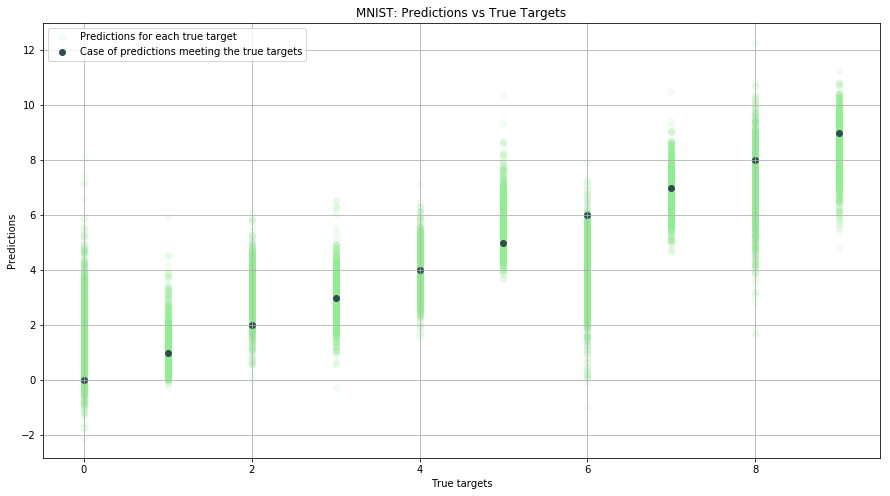

In [33]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.title("MNIST: Predictions vs True Targets")
plt.grid()
x = ax.scatter(np.array(MNIST_test_labels), np.array(MNIST_predictions), c='lightgreen', alpha=.1)
y = ax.scatter(range(10), range(10), c='darkslategrey' )
plt.legend([x,y], ['Predictions for each true target','Case of predictions meeting the true targets'])
plt.xlabel("True targets")
plt.ylabel("Predictions")
plt.show()

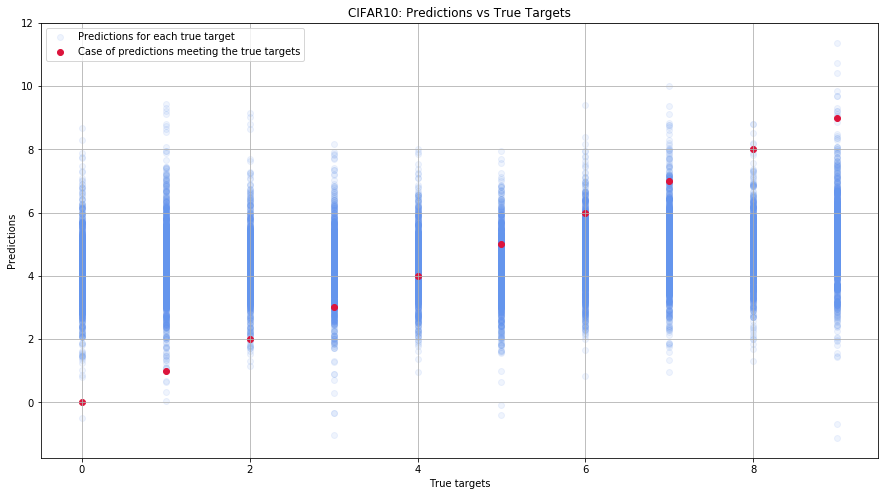

In [3]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1,1,1)
plt.title("CIFAR10: Predictions vs True Targets")
plt.grid()
x = ax.scatter(np.array(test_classes), np.array(cifar_predictions), c='cornflowerblue', alpha=.1)
y = ax.scatter(range(10), range(10), c='crimson')
plt.legend([x,y], ['Predictions for each true target','Case of predictions meeting the true targets'])
plt.xlabel("True targets")
plt.ylabel("Predictions")
plt.show()

** d. Discretizing the predictions, displaying the confusion matrices and reporting the accuracy ** 

>**Answer**

>A way to discretize the predictions is to round the results. I tried other solutions using the math library's ceil and floor functions but the accuracies of the two datasets don't move in the same direction. Therefore, I ended up choosing to round the obtained predictions.

In [35]:
#MNIST
import pandas as pd
discretized_preds = [round(x) for x in MNIST_predictions]
pd.DataFrame(np.column_stack([MNIST_predictions[:5], discretized_preds[:5]]),\
             columns=['Original first 5 Predictions', 'Discretized first 5 Predictions' ])

,Original first 5 Predictions,Discretized first 5 Predictions
0,7.576902,8.0
1,2.750695,3.0
2,0.575386,1.0
3,0.794431,1.0
4,3.692337,4.0


In [36]:
#CIFAR10
discretized_preds2 = [round(x) for x in cifar_predictions]
pd.DataFrame(np.column_stack([cifar_predictions[:5], discretized_preds2[:5]]),\
             columns=['Original first 5 Predictions', 'Discretized first 5 Predictions' ])

,Original first 5 Predictions,Discretized first 5 Predictions
0,4.651242,5.0
1,5.612981,6.0
2,5.339871,5.0
3,4.093843,4.0
4,4.540033,5.0


In [37]:
#Confusion matrix:
import pandas as pd
from collections import Counter
ctr1 = Counter([(x,y) for x,y in zip(discretized_preds, MNIST_test_labels)])
Mat1=[]
for i in range(10):
    l=[]
    for j in range(10):
        l+=[ctr1[(i,j)]]
    Mat1+=[l]
    
pd.DataFrame(data=Mat1)

,0,1,2,3,4,5,6,7,8,9
0,185,122,2,1,0,0,13,0,0,0
1,241,621,36,26,0,0,21,0,0,0
2,249,197,213,230,24,0,93,0,3,0
3,170,48,465,463,245,0,189,0,4,0
4,75,10,233,247,489,72,328,0,25,0
5,25,1,45,26,215,446,259,27,77,2
6,4,1,6,5,26,350,82,251,189,25
7,4,0,0,2,1,103,13,547,281,123
8,1,0,0,0,0,23,1,152,254,329
9,0,0,0,0,0,5,0,22,137,397


In [3]:
#Confusion matrix:
from collections import Counter
ctr2 = Counter([(x,y) for x,y in zip(discretized_preds2, test_classes)])
Mat2=[]
for i in range(10):
    l=[]
    for j in range(10):
        l+=[ctr2[(i,j)]]
    Mat2+=[l]
    
pd.DataFrame(data=Mat2)

,0,1,2,3,4,5,6,7,8,9
0,1,2,0,3,0,2,0,0,0,0
1,11,12,2,5,2,2,1,2,1,2
2,41,46,37,38,25,47,18,17,11,11
3,223,164,165,161,150,170,117,99,76,76
4,391,316,407,379,396,358,306,286,309,192
5,232,266,287,298,317,313,364,311,403,340
6,78,136,77,90,90,87,151,194,157,245
7,18,45,19,19,16,18,34,64,33,93
8,4,5,2,6,4,3,8,19,7,27
9,1,8,4,0,0,0,1,7,3,6


In [39]:
print('MNIST accuracy: ', MNIST_accuracy,'%')  

MNIST accuracy:  36.97 %


In [40]:
print('CIFAR10 accuracy: ', cifar_accuracy,'%')  

CIFAR10 accuracy:  11.48 %


** e. Regression performance w.r.t classification performance** 

>**Answer**

>Regression performance was significantly lower compared to the classification performance in terms of accuracy. However, the prediction through regression was faster.

|Dataset             | Classification Accuracy | Regression Accuracy |
|:------------------:|:-------------------:|:-----------------------:|
|MNIST               |      69%            |        37%              |
|CIFAR10             |      28%            |        11%              |

>This is quite expected because we're trying to apply regression for a classification problem. In practice we could achieve considerable results given that we apply the necessairy and adeqaute pre processings. MLE and the Bayesian approach lead to the same result meaning that for a large number of samples the expected prediction is equal to the MLE prediction. This is logical since the posterior distribution for W becomes more and more certain the more training samples we have (the variances for the W values decrease). Taking expected values gets closer to the actual value which also happens with the MLE estimator when adding more data.

** f. Limitation of using regression for this task ** 

>**Answer**

>The main limitation of using regression is that there is no real linear relationship between classes (the output) and images (the input). This is in addition to having a lot of noise and outliers in our datasets.
We have to assign a fixed weight to each pixel (plus an additional bias term). We could think of more flexible models like neural networks that only take certain combinations of pixels into account if they exceed a threshold value. These can even be extended to convolutional neural networks that take patterns inside images into account. Here the linear regression is clearly inferior because it does not produce translation or scale-invariant results. Shrinking the digit on an MNIST picture would make the trained regression model useless. Moreover, the linear regression does not take any care of structure in the data (which is important for image analysis). Shuffling the pixels and retraining the models would simply result in shuffled weights. For CIFAR we clearly need to incorporate the structure of the images into our model. Convolutional neural networks are known to work quite well.

# Towards high Performance. Convolutional Layers

Our approach in order to achieve a considerably high performance in or models is to apply linear regression on the convolutional output of LeNet5. In order to train this CNN we use the keras Python library which makes it very easy to train neural networks and alter the architecture afterwards.


In [4]:
# !pip install dill   # this saves an instance of the notebook to avoid retraininig everything after a kernel reset

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [43]:
# !pip install dill
# import dill
# dill.dump_session('notebook_env.db')

In [2]:
# !pip install dill
# import dill
# dill.load_session('notebook_env.db')

    100% |################################| 71kB 1.9MB/s ta 0:00:01
  Running setup.py bdist_wheel for dill ... done
  Stored in directory: /root/.cache/pip/wheels/99/c4/ed/1b64d2d5809e60d5a3685530432f6159d6a9959739facb61f2
Successfully built dill
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
!pip install keras  #we use keras for it's ready and flexible CNN models and datasets

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(6, (5, 5), padding="same", activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Conv2D(16, (5, 5), padding="valid", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())
## we stop here at the flatten layer level in order to use the bayesian regressor

model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 25s 412us/step - loss: 0.6452 - acc: 0.7585 - val_loss: 0.4623 - val_acc: 0.8324
Epoch 2/10
60000/60000 [==============================] - 23s 383us/step - loss: 0.3926 - acc: 0.8549 - val_loss: 0.3921 - val_acc: 0.8568
Epoch 3/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.3373 - acc: 0.8758 - val_loss: 0.3571 - val_acc: 0.8715
Epoch 4/10
60000/60000 [==============================] - 22s 374us/step - loss: 0.3076 - acc: 0.8871 - val_loss: 0.3415 - val_acc: 0.8773
Epoch 5/10
60000/60000 [==============================] - 22s 375us/step - loss: 0.2862 - acc: 0.8949 - val_loss: 0.3393 - val_acc: 0.8740
Epoch 6/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.2688 - acc: 0.9008 - val_loss: 0.3060 - val_acc: 0.8898
Epoch 7/10
60000/60000 [===================

In [16]:
# we train our model for another 20 epochs to improve the accuracy
# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=20,
#           verbose=1,
#           validation_data=(x_test, y_test))
#we commented out the results in order to save space

In [10]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.41724042314887044
Test accuracy: 0.8999


In [11]:
#it would be wise to save the model
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
#model = load_model('my_model.h5')

In [12]:
# popping 3 last layers -> output of the flatten layer after the convolutions# poppin 
model.layers.pop(); model.layers.pop(); model.layers.pop()
model.outputs = [model.layers[-1].output]
model.layers[-1].outbound_nodes = []
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
#preparing the inputs for the NBC
mnist_Xconv_train = model.predict(x_train)
mnist_Xconv_test = model.predict(x_test)   

#reshaping the inputs to align them with my code
list_train = [elem for elem in mnist_Xconv_train.reshape(60000,20,20)]
list_test = [elem for elem in mnist_Xconv_test.reshape(10000,20,20)]

list_y_train = [np.argmax(y_train[i]) for i in range(len(y_train))]
list_y_test = [np.argmax(y_test[i]) for i in range(len(y_test))]

In [2]:
predictions= NBC(list_train, list_y_train, list_test, list_y_test, 20, 1) 